# Exploratory Data Analysis And Stock Analysis With Time series Data

In [1]:
%pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import pandas_datareader as pdr # https://pandas-datareader.readthedocs.io/en/latest/
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import yfinance as yf

# Get Stock price details from Yahoo finance

In [16]:
sharesList = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2025, 4, 1)

In [17]:
df_complete = yf.download(sharesList, start= start, end= end, progress=False)

In [18]:
df_complete.Close.head()

Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2020-01-02,72.716080,94.900497,68.108376,153.323273,28.684000
2020-01-03,72.009117,93.748497,67.752075,151.414078,29.534000
2020-01-06,72.582916,95.143997,69.557945,151.805481,30.102667
2020-01-07,72.241531,95.343002,69.423592,150.421341,31.270666
2020-01-08,73.403633,94.598503,69.917732,152.817307,32.809334


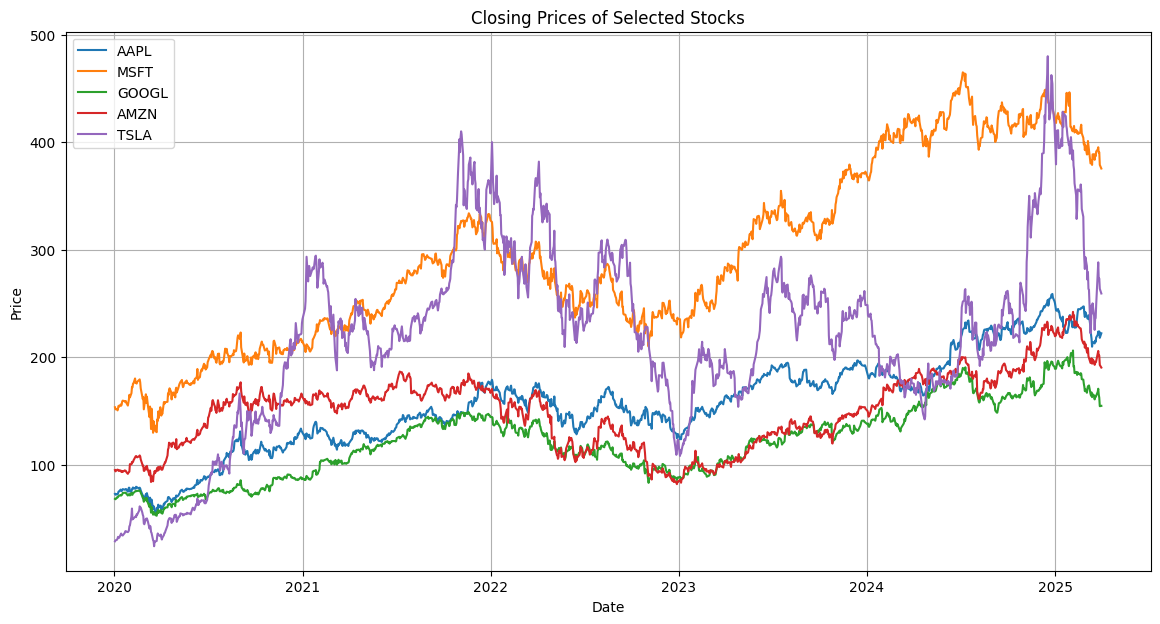

In [19]:
# Plot the closing prices
plt.figure(figsize=(14, 7))
for share in sharesList:
    plt.plot(df_complete['Close'][share], label=share)
plt.title('Closing Prices of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

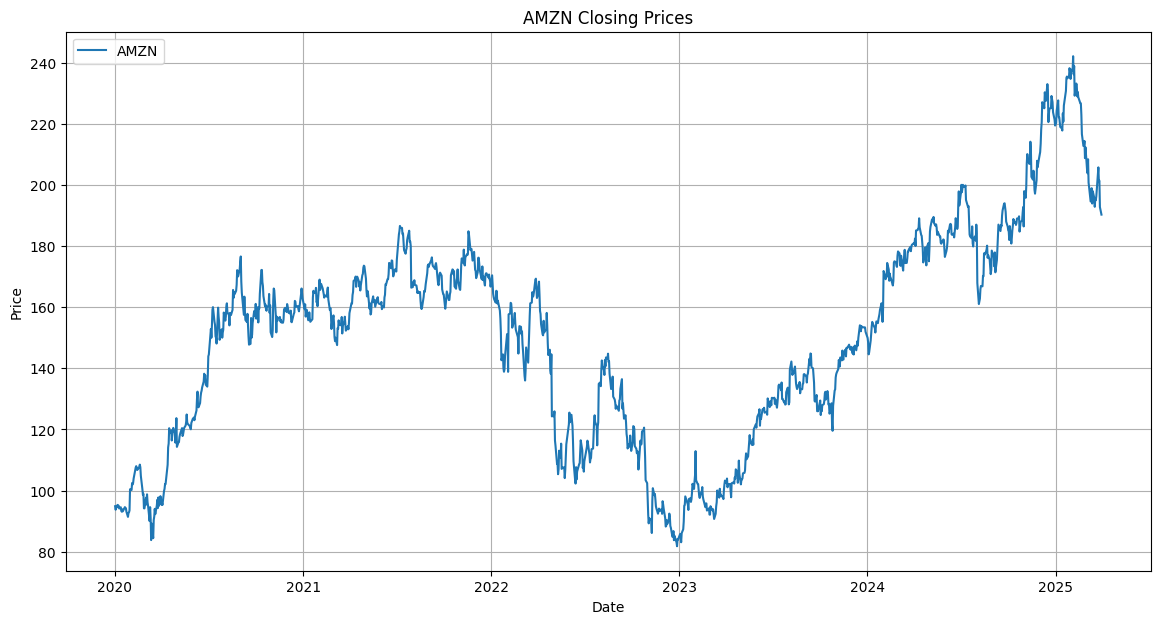

In [20]:
# Plot AMZN
plt.figure(figsize=(14, 7))
plt.plot(df_complete['Close']['AMZN'], label='AMZN')
plt.title('AMZN Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Calculate Simple moving average

In [21]:
# Add a new column to the DataFrame to calculate simple moving average of AMZN close price
# rolling_window = 200
df_complete['SMA_200'] = df_complete['Close']['AMZN'].rolling(window=200).mean()
df_complete['SMA_50'] = df_complete['Close']['AMZN'].rolling(window=50).mean()
df_complete['SMA_10'] = df_complete['Close']['AMZN'].rolling(window=10).mean()

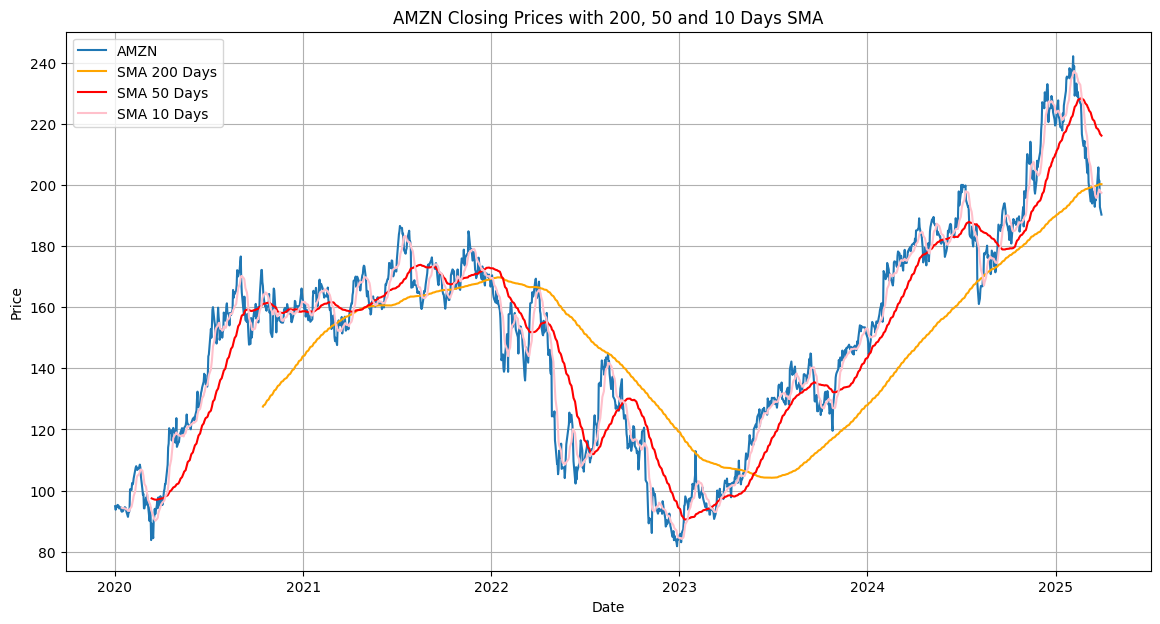

In [22]:
# Plot AMZN with SMA
plt.figure(figsize=(14, 7))
plt.plot(df_complete['Close']['AMZN'], label='AMZN')
plt.plot(df_complete['SMA_200'], label='SMA 200 Days', color='orange')
plt.plot(df_complete['SMA_50'], label='SMA 50 Days', color='red')
plt.plot(df_complete['SMA_10'], label='SMA 10 Days', color='pink')
plt.title('AMZN Closing Prices with 200, 50 and 10 Days SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()